In [11]:
import matplotlib.pyplot as plt 
import numpy as np 
from mpl_toolkits import mplot3d

In [12]:
length = float(input("Length of the Foucalt pendulum (L) : "))
earth_timeperiod = 24*3600
latitude = float(input("Enter the latitude of the region : "))
earth = (2*np.pi*np.sin(latitude))/earth_timeperiod
omega = (9.81/length)**0.5
x0 = float(input("Enter initial value of x :"))
y0 = float(input("Enter initial value of y :"))
pendulum_timeperiod = 2*np.pi/omega
n = int((pendulum_timeperiod*10)*earth_timeperiod)
h = float(1.0/n)

In [13]:
def fx (x, vx) :
    return ((-(omega**2)*x)+(earth*vx))
def fy (y, vy) :
    return ((-(omega**2)*y)-(earth*vy))
def gx (x, vx) :
    return vx
def gy (y, vy) :
    return vy

In [14]:
def rk4 (u0, vu0, f, g) :
    u_i = u0
    vu_i = vu0
    u = [u0]
    vu = [vu0]
    for i in range (n):
        k1 = h*g(u_i,vu_i)
        k2 = h*g(u_i+(k1/2),vu_i)
        k3 = h*g(u_i+(k2/2),vu_i)
        k4 = h*g(u_i+k3,vu_i)
        u_i += (k1+(2*k2)+(2*k3)+k4)/6
        k1 = h*f(u_i,vu_i)
        k2 = h*f(u_i,vu_i+(k1/2))
        k3 = h*f(u_i,vu_i+(k2/2))
        k4 = h*f(u_i,vu_i+k3)
        vu_i += (k1+(2*k2)+(2*k3)+k4)/6
        u.append(u_i)
        vu.append(vu_i)
    return u

<ipython-input-15-fdc8c35dc7ab>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x = np.array(rk4(x0, 0, fx, gx))
<ipython-input-15-fdc8c35dc7ab>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  y = np.array(rk4(y0, 0, fy, gy))


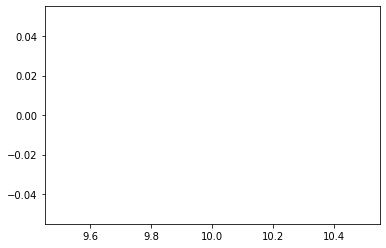

In [15]:
x = (rk4(x0, 0, fx, gx))
y = (rk4(y0, 0, fy, gy))
plt.plot(x,y)
plt.show()